In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import os

In [2]:
root = '../data/cakes-dataset/'
train_path = os.path.join(root + 'train/')
test_path = os.path.join(root + 'test/')
validation_path = os.path.join(root +'validation/')

train_pics = [(folder, files) for folder in os.listdir(train_path) 
                              for files in os.listdir(os.path.join(train_path+folder))]

In [14]:
def train_count(train_path):
    train_count_list=[]
    for folder in os.listdir(train_path):
        count=0
        for files in os.listdir(os.path.join(train_path+folder)):
            count = count + 1
        temp = folder, count
        train_count_list.append(temp)
    
    return train_count_list

def test_count(test_path):
    test_count_list=[]
    for folder in os.listdir(test_path):
        count=0
        for files in os.listdir(os.path.join(test_path+folder)):
            count = count + 1
        temp = folder, count
        test_count_list.append(temp)
    
    return test_count_list

def validation_count(validation_path):
    validation_count_list=[]
    for folder in os.listdir(validation_path):
        count=0
        for files in os.listdir(os.path.join(validation_path+folder)):
            count = count + 1
        temp = folder, count
        validation_count_list.append(temp)
    
    return validation_count_list


In [15]:
train = train_count(train_path)
test = test_count(test_path)
validation = validation_count(validation_path)

In [16]:
print('train dataset: ', train)
print('test dataset: ', test)
print('validation dataset: ', validation)

train dataset:  [('cheesecake', 416), ('chocolate', 400), ('pie', 448), ('red_velvet', 384)]
test dataset:  [('cheesecake', 130), ('chocolate', 122), ('pie', 140), ('red_velvet', 120)]
validation dataset:  [('cheesecake', 84), ('chocolate', 100), ('pie', 112), ('red_velvet', 96)]


In [21]:
dataset = [('cheesecake', 416, 130, 84, 416+130+84), ('chocolate', 400, 122, 100, 400+122+100), ('pie', 448, 140, 112, 448+140+112), ('red_velvet', 384, 120, 96, 384+120+96)]
dataset

[('cheesecake', 416, 130, 84, 630),
 ('chocolate', 400, 122, 100, 622),
 ('pie', 448, 140, 112, 700),
 ('red_velvet', 384, 120, 96, 600)]

In [33]:
import glob
from PIL import Image

# FOR TRAIN DATASET
cheesecake = []
for filename in glob.glob(os.path.join(train_path, 'cheesecake/*.jpg')):
    im=Image.open(filename)
    cheesecake.append(im)

chocolate = []
for filename in glob.glob(os.path.join(train_path, 'chocolate/*.jpg')):
    im=Image.open(filename)
    chocolate.append(im)

pie = []
for filename in glob.glob(os.path.join(train_path, 'pie/*.jpg')):
    im=Image.open(filename)
    pie.append(im)

red_velvet = []
for filename in glob.glob(os.path.join(train_path, 'red_velvet/*.jpg')):
    im=Image.open(filename)
    red_velvet.append(im)

In [45]:
import matplotlib.pyplot as plt
n = 30
img = [cheesecake[n], chocolate[n], pie[n], red_velvet[n]]
title = ['cheesecake', 'chocolate', 'pie', 'red velvet']
rows = 1
cols = len(img)


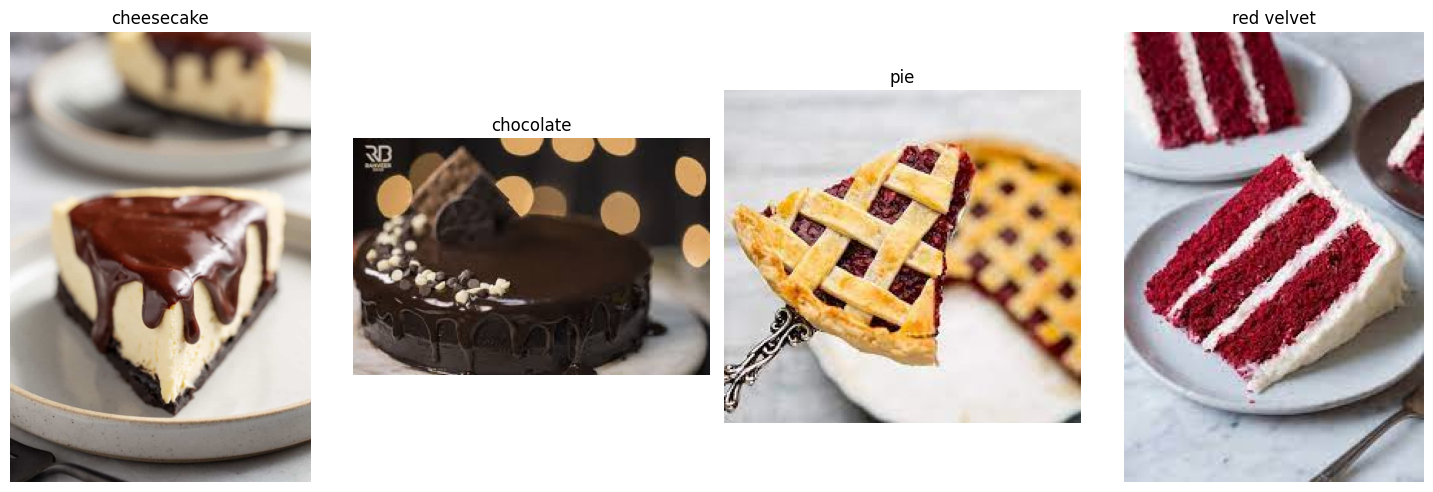

In [46]:
import matplotlib.pyplot as plt
n = 30
img = [cheesecake[n], chocolate[n], pie[n], red_velvet[n]]
title = ['cheesecake', 'chocolate', 'pie', 'red velvet']
rows = 1
cols = len(img)


fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

for i in range(cols):
    ax = axes[i] if cols > 1 else axes

    ax.imshow(img[i])
    ax.set_title(title[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [61]:
augmented_dataset = os.path.join(root, 'augmented')
augmented_train_dataset = os.path.join(augmented_dataset, 'train')
augmented_test_dataset = os.path.join(augmented_dataset, 'test')

if not os.path.isdir(augmented_dataset):
    os.makedirs(augmented_dataset, exist_ok=True)
    os.makedirs(augmented_train_dataset, exist_ok=True)
    os.makedirs(augmented_test_dataset, exist_ok=True)

     # create label folders
    for d in os.listdir(test_path):
        mk = os.path.join(augmented_test_dataset, d)
        try:
            os.mkdir(mk)
        except OSError as e:
            if e.errno == errno.EEXIST:
                print(f'{mk} already exists!')
            else:
                raise
    for d in os.listdir(train_path):
        mk = os.path.join(augmented_train_dataset, d)
        try:
            os.mkdir(mk)
        except OSError as e:
            if e.errno == errno.EEXIST:
                print(f'{mk} already exists!')
            else:
                raise

In [49]:
def augment_affine_jitter_blur(orig_img):
    """
    Augment with multiple transformations
    """
    train_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomAffine(degrees=10, translate=(0.05, 0.05), shear=5),
        transforms.RandomPerspective(distortion_scale=0.3, p=0.2),
        transforms.CenterCrop((180, 180)),
        transforms.ColorJitter(brightness=.7),
        transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 5)),
        transforms.RandomHorizontalFlip(),
        ])
    return train_transform(orig_img)


def augment_blur(orig_img):
    """
    Augment with center crop and bluring
    """
    train_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop((220, 220)),
        transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 5))
        ])
    return train_transform(orig_img)

In [62]:
import torchvision
from torchvision import transforms

import shutil
test_cnt = 0
train_cnt = 0
aug = 2

# copy test folder files
for (dirpath, _, filenames) in os.walk(test_path):
    print(f'copying {dirpath} -> {augmented_test_dataset}')
    for filename in filenames:
        if filename.endswith('.jpg'):
            relsourcepath = os.path.relpath(dirpath, test_path)
            destpath = os.path.join(augmented_test_dataset, relsourcepath)

            destfile = os.path.join(destpath, filename)
            shutil.copyfile(os.path.join(dirpath, filename), destfile)
            test_cnt += 1

# copy and augment train folder files
for (dirpath, _, filenames) in os.walk(train_path):
    print(f'copying and augmenting {dirpath} -> {augmented_train_dataset}')
    for filename in filenames:
        if filename.endswith('.jpg'):
            relsourcepath = os.path.relpath(dirpath, train_path)
            destpath = os.path.join(augmented_train_dataset, relsourcepath)
            srcfile = os.path.join(dirpath, filename)
            destfile = os.path.join(destpath, filename)

            # original file
            shutil.copyfile(srcfile, destfile)
            train_cnt += 1

            orig_img = Image.open(srcfile)
            orig_img = orig_img.convert('RGB')

            # crop center & blur only
            aug_img = augment_blur(orig_img)
            augfile = destfile[:-4] + '_ab' + str(0) + '.jpg'
            aug_img.save(augfile)
            train_cnt += 1

            # random jitter, affine, brightness & blur
            for i in range(aug):
                aug_img = augment_affine_jitter_blur(orig_img)
                augfile = destfile[:-4] + '_aj' + str(i) + '.jpg'
                aug_img.save(augfile)
                train_cnt += 1

for (dirpath, _, filenames) in os.walk(validation_path):
    print(f'copying and augmenting {dirpath} -> {augmented_train_dataset}')
    for filename in filenames:
        if filename.endswith('.jpg'):
            relsourcepath = os.path.relpath(dirpath, validation_path)
            destpath = os.path.join(augmented_train_dataset, relsourcepath)
            srcfile = os.path.join(dirpath, filename)
            destfile = os.path.join(destpath, filename)

            # original file
            shutil.copyfile(srcfile, destfile)
            train_cnt += 1

            orig_img = Image.open(srcfile)
            orig_img = orig_img.convert('RGB')

            # crop center & blur only
            aug_img = augment_blur(orig_img)
            augfile = destfile[:-4] + '_ab' + str(0) + '.jpg'
            aug_img.save(augfile)
            train_cnt += 1

            # random jitter, affine, brightness & blur
            for i in range(aug):
                aug_img = augment_affine_jitter_blur(orig_img)
                augfile = destfile[:-4] + '_aj' + str(i) + '.jpg'
                aug_img.save(augfile)
                train_cnt += 1

print(f'Augmented dataset: {test_cnt} test, {train_cnt} train samples')

copying ../data/cakes-dataset/test/ -> ../data/cakes-dataset/augmented\test
copying ../data/cakes-dataset/test/cheesecake -> ../data/cakes-dataset/augmented\test
copying ../data/cakes-dataset/test/chocolate -> ../data/cakes-dataset/augmented\test
copying ../data/cakes-dataset/test/pie -> ../data/cakes-dataset/augmented\test
copying ../data/cakes-dataset/test/red_velvet -> ../data/cakes-dataset/augmented\test
copying and augmenting ../data/cakes-dataset/train/ -> ../data/cakes-dataset/augmented\train
copying and augmenting ../data/cakes-dataset/train/cheesecake -> ../data/cakes-dataset/augmented\train
copying and augmenting ../data/cakes-dataset/train/chocolate -> ../data/cakes-dataset/augmented\train
copying and augmenting ../data/cakes-dataset/train/pie -> ../data/cakes-dataset/augmented\train
copying and augmenting ../data/cakes-dataset/train/red_velvet -> ../data/cakes-dataset/augmented\train
copying and augmenting ../data/cakes-dataset/validation/ -> ../data/cakes-dataset/augmented

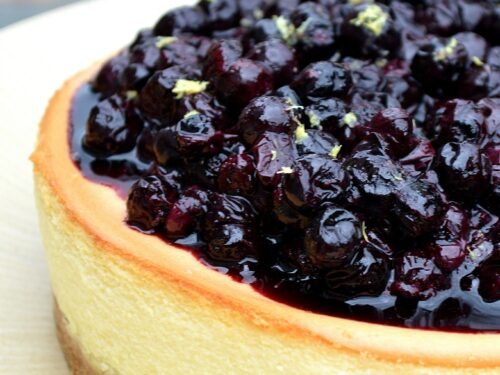

In [25]:
import glob
from PIL import Image

srcfile= os.path.join(train_path, 'cheesecake/10 Cheesecake Toppings.jpg')
orig_img = Image.open(srcfile)
orig_img

In [7]:
import torch
import torchvision
from torchvision import transforms

def augment_affine_jitter_blur(orig_img):
    """
    Augment with multiple transformations
    """
    train_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomAffine(degrees=10, translate=(0.05, 0.05), shear=5),
        transforms.RandomPerspective(distortion_scale=0.3, p=0.2),
        transforms.CenterCrop((180, 180)),
        transforms.ColorJitter(brightness=.7),
        transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 5)),
        transforms.RandomHorizontalFlip(),
        ])
    return train_transform(orig_img)


def augment_blur(orig_img):
    """
    Augment with center crop and bluring
    """
    train_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop((220, 220)),
        transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 5))
        ])
    return train_transform(orig_img)

In [ ]:
import matplotlib.pyplot as plt
img = [affine, blur, affine_blur, blur_affine]
title = ['affine', 'blur', 'affine blur', 'blur affine']
rows = 1
cols = len(img)


fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

for i in range(cols):
    ax = axes[i] if cols > 1 else axes

    ax.imshow(img[i])
    ax.set_title(title[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
affine = augment_affine_jitter_blur(orig_img)
blur = augment_blur(orig_img)
affine_blur = augment_blur(affine)
blur_affine = augment_affine_jitter_blur(blur)

In [29]:
size=orig_img.size
l = size[0]
h = size[1]
print('length: ', l)
print('height: ', h)

length:  500
height:  375


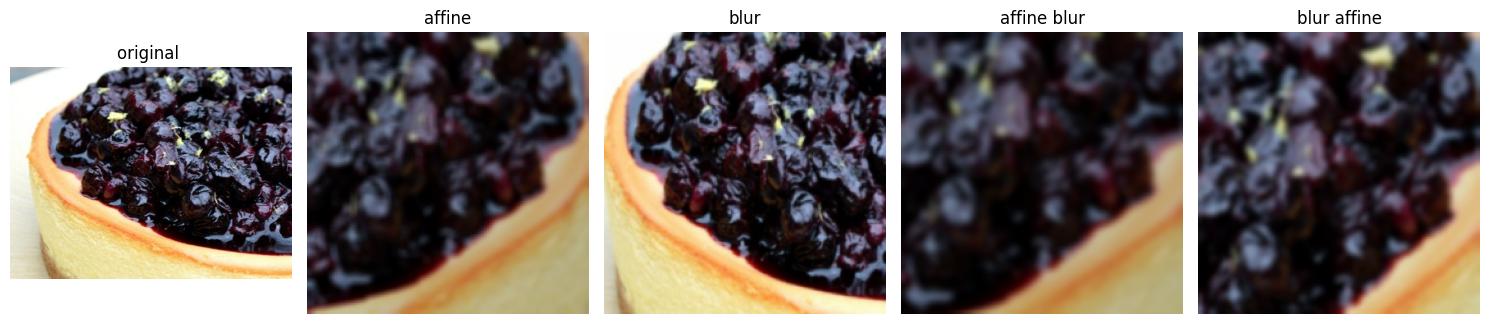

In [14]:
import matplotlib.pyplot as plt
img = [orig_img, affine, blur, affine_blur, blur_affine]
title = ['original ','affine', 'blur', 'affine blur', 'blur affine']
rows = 1
cols = len(img)


fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

for i in range(cols):
    ax = axes[i] if cols > 1 else axes

    ax.imshow(img[i])
    ax.set_title(title[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [31]:
from PIL import Image, ImageOps

def pad_image(image_path, width, height):
    # Open the image using Pillow
    img = image_path

    # Pad the image to the specified width and height with a color (black in this case)
    padded_image = ImageOps.pad(img, (width, height))

    # Save or display the padded image
    padded_image.save('padded_image.png')  # Save the padded image to a file
    padded_image.show()  # Display the padded image

# Specify the path to your image and the desired width and height
image_path = orig_img
desired_width = 1200
desired_height = 1200

# Pad the image to the specified width and height
pad_image(image_path, desired_width, desired_height)


In [69]:
root = '../data/cakes-dataset/'
train_path = os.path.join(root + 'train/')
test_path = os.path.join(root + 'test/')
validation_path = os.path.join(root +'validation/')
size=[]
for classes in listdir(train_path):
    for image in listdir(os.path.join(train_path, classes)):
        img_path = os.path.join(train_path, classes, image)
        orig_img = Image.open(img_path)
        width, height = orig_img.size

        if width > height:
            height = width
        else:
            width = height

        size.append([height, width])

In [70]:
size

[[500, 500],
 [612, 612],
 [700, 700],
 [1998, 1998],
 [998, 998],
 [1024, 1024],
 [1240, 1240],
 [1200, 1200],
 [2000, 2000],
 [2000, 2000],
 [1930, 1930],
 [2000, 2000],
 [1024, 1024],
 [480, 480],
 [1500, 1500],
 [1080, 1080],
 [1500, 1500],
 [1200, 1200],
 [2500, 2500],
 [720, 720],
 [1050, 1050],
 [1500, 1500],
 [1500, 1500],
 [500, 500],
 [1920, 1920],
 [1000, 1000],
 [2000, 2000],
 [500, 500],
 [3008, 3008],
 [1050, 1050],
 [1103, 1103],
 [4592, 4592],
 [1920, 1920],
 [1200, 1200],
 [1202, 1202],
 [1200, 1200],
 [601, 601],
 [1200, 1200],
 [1269, 1269],
 [976, 976],
 [640, 640],
 [1800, 1800],
 [975, 975],
 [975, 975],
 [975, 975],
 [450, 450],
 [1800, 1800],
 [1024, 1024],
 [1024, 1024],
 [1024, 1024],
 [2250, 2250],
 [1200, 1200],
 [767, 767],
 [1000, 1000],
 [2694, 2694],
 [1920, 1920],
 [1800, 1800],
 [800, 800],
 [900, 900],
 [1724, 1724],
 [2088, 2088],
 [2100, 2100],
 [1400, 1400],
 [2100, 2100],
 [1812, 1812],
 [4819, 4819],
 [2560, 2560],
 [1370, 1370],
 [900, 900],
 [1

Getting the max height and max length of the image to standardize the dataset

In [63]:
root = '../data/cakes-dataset/'
train_path = os.path.join(root + 'train/')
test_path = os.path.join(root + 'test/')
validation_path = os.path.join(root +'validation/')

max_w=0
max_h=0

print('TRAIN')
for classes in listdir(train_path):
    print(classes)
    for image in listdir(os.path.join(train_path, classes)):
        img_path = os.path.join(train_path, classes, image)
        orig_img = Image.open(img_path)
        wid, hei = orig_img.size

        if max_w < wid:
            max_w = wid
        if max_h < hei:
            max_h = hei
        if min_w > wid:
            min_w = wid
        if min_h > hei:
            min_h = hei

print('TEST')
for classes in listdir(test_path):
    print(classes)
    for image in listdir(os.path.join(test_path, classes)):
        img_path = os.path.join(test_path, classes, image)
        orig_img = Image.open(img_path)
        wid, hei = orig_img.size

        if max_w < wid:
            max_w = wid
        if max_h < hei:
            max_h = hei
        if min_w > wid:
            min_w = wid
        if min_h > hei:
            min_h = hei

print('VALIDATION')
for classes in listdir(validation_path):
    print(classes)
    for image in listdir(os.path.join(validation_path, classes)):
        img_path = os.path.join(validation_path, classes, image)
        orig_img = Image.open(img_path)
        wid, hei = orig_img.size

        if max_w < wid:
            max_w = wid
        if max_h < hei:
            max_h = hei
        if min_w > wid:
            min_w = wid
        if min_h > hei:
            min_h = hei

TRAIN
cheesecake
chocolate
pie
red_velvet
TEST
cheesecake
chocolate
pie
red_velvet
VALIDATION
cheesecake
chocolate
pie
red_velvet


In [64]:
max=(max_w, max_h)
min=(min_w, min_h)
print("max dim: ", max)
print("min dim: ", min)


max dim:  (6625, 5617)
min dim:  (0, 0)


In [61]:
def pad_image(image, pad_width, pad_height):
    # Define torchvision transform for padding
    transform = transforms.Compose([
        transforms.Pad((pad_width, pad_height), fill=0, padding_mode='constant'),
        transforms.Resize((256, 256)),
        transforms.CenterCrop((128, 128)),  # Adjust fill and padding_mode as needed
    ])

    # Convert the image to a PyTorch tensor
    img_tensor = transforms.ToTensor()(image)

    # Apply padding using torchvision transform
    padded_tensor = transform(img_tensor)

    # Convert the padded tensor back to PIL image
    padded_image = transforms.ToPILImage()(padded_tensor)

    return padded_image

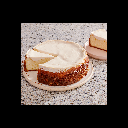

In [62]:
img = '../data/cakes-dataset/validation/cheesecake/Three Cities of Spain Cheesecake Recipe....jpg'
orig_img = Image.open(img)
padded=pad_image(orig_img, 6625, 5617)
padded


In [3]:
from PIL import Image, ImageOps

def image_to_hex(image_path):
    # Open the image using PIL
    img = Image.open(image_path)
    
    # Convert the image to RGB mode (in case it's in a different mode)
    img = img.convert("RGB")
    
    hex_code = []
    width, height = img.size
    
    # Iterate through each pixel to get its RGB values and convert them to hex
    for y in range(height):
        for x in range(width):
            r, g, b = img.getpixel((x, y))
            hex_value = "#{:02x}{:02x}{:02x}".format(r, g, b)  # Convert RGB to hex
            hex_code.append(hex_value)
    
    return hex_code

In [4]:
# Provide the path to your image
image_path = '../data/cakes-dataset/validation/cheesecake/Three Cities of Spain Cheesecake Recipe....jpg'  # Replace with your image file path
hex_codes = image_to_hex(image_path)

In [5]:
hex_codes

['#bdb5b3',
 '#bdb5b3',
 '#bdb4b5',
 '#bcb3b4',
 '#bcb3b4',
 '#bdb4b5',
 '#beb5b6',
 '#beb5b6',
 '#beb5b6',
 '#beb5b6',
 '#bfb6b9',
 '#bfb6b9',
 '#bfb6b9',
 '#bfb6b9',
 '#c0b7ba',
 '#c0b7ba',
 '#bfb9bb',
 '#bfb9bb',
 '#c0babc',
 '#c1bbbd',
 '#c2bcc0',
 '#c2bcc0',
 '#c2bcc0',
 '#c2bcc0',
 '#c3bdc1',
 '#c4bec2',
 '#c4bec2',
 '#c4bec2',
 '#c2bdc1',
 '#c2bdc1',
 '#c2bdc1',
 '#c3bec2',
 '#c5bfc3',
 '#c5bfc3',
 '#c7bec3',
 '#c8bfc2',
 '#cabec2',
 '#cbbfc1',
 '#cbbfbf',
 '#cbbfbf',
 '#cac0bf',
 '#cac0bf',
 '#cbc1bf',
 '#cbc1bf',
 '#cbc1bf',
 '#cac0be',
 '#cac0be',
 '#c9bfbd',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#cbc1c0',
 '#ccc2c1',
 '#ccc2c1',
 '#ccc2c1',
 '#ccc2c1',
 '#cbc1c0',
 '#cac0bf',
 '#cac0bf',
 '#cac2c0',
 '#c9c1bf',
 '#c9c1bf',
 '#c